    Usia  Pendapatan   Pekerjaan Pembelian
0     29        2269     Pegawai        Ya
1     37        2822   Pengusaha     Tidak
2     25        3396  Wiraswasta        Ya
3     63        4199   Pengusaha        Ya
4     65        2453     Pegawai     Tidak
5     41        3518  Wiraswasta     Tidak
6     60        4849     Pegawai        Ya
7     32        2072   Pengusaha     Tidak
8     62        3170  Wiraswasta        Ya
9     52        2284     Pegawai     Tidak
10    22        3256   Pengusaha        Ya
11    48        4405  Wiraswasta        Ya
12    60        2411     Pegawai     Tidak
13    38        3127   Pengusaha     Tidak
14    47        4805  Wiraswasta        Ya
15    49        3270     Pegawai        Ya
16    60        3791   Pengusaha     Tidak
17    56        2951  Wiraswasta        Ya
18    36        4497     Pegawai     Tidak
19    53        2932   Pengusaha        Ya
20    18        2702  Wiraswasta     Tidak
21    57        2460     Pegawai        Ya
22    43   

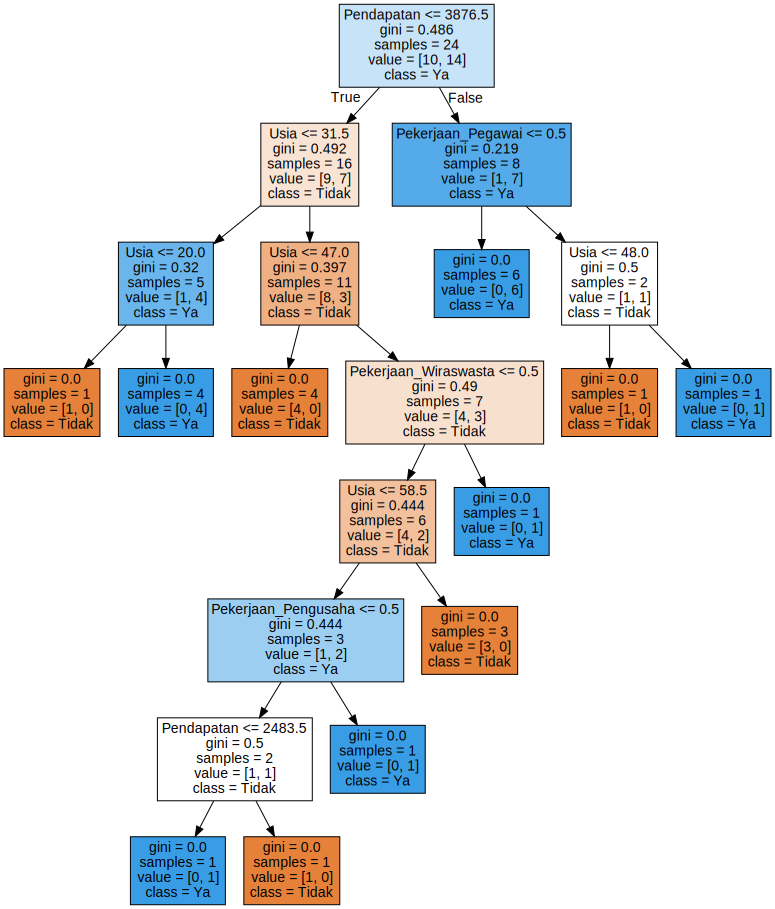

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Membuat data customer
data = {
    'Usia': [random.randint(18, 65) for _ in range(30)],
    'Pendapatan': [random.randint(2000, 5000) for _ in range(30)],
    'Pekerjaan': ['Pegawai', 'Pengusaha', 'Wiraswasta', 'Pengusaha', 'Pegawai', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai',
                  'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha',
                  'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta'],
    'Pembelian': ['Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Ya', 'Tidak',
                  'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya', 'Ya']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan dataset
print(df)

# Mengubah fitur kategorikal menjadi one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Pekerjaan'])

# Memisahkan fitur dan target
X = df_encoded.drop('Pembelian', axis=1)
y = df_encoded['Pembelian']

# Split dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict menggunakan Naive Bayes classifier
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_accuracy)

# Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict menggunakan Decision Tree classifier
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy:", dt_accuracy)

# Membuat visualisasi decision tree
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, class_names=['Tidak', 'Ya'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Menampilkan decision tree
graph

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import random

class CustomerClassifier:
    def __init__(self, data):
        self.data = data
        self.df_encoded = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.dt_model = None

    def preprocess_data(self):
        # Membuat DataFrame
        self.df_encoded = pd.DataFrame(self.data)

        # Mengubah fitur kategorikal menjadi one-hot encoding
        self.df_encoded = pd.get_dummies(self.df_encoded, columns=['Pekerjaan'])

        # Memisahkan fitur dan target
        X = self.df_encoded.drop('Pembelian', axis=1)
        y = self.df_encoded['Pembelian']

        # Split dataset menjadi training dan testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_decision_tree(self):
        # Decision Tree classifier
        self.dt_model = DecisionTreeClassifier()
        self.dt_model.fit(self.X_train, self.y_train)

    def evaluate_decision_tree(self):
        # Predict menggunakan Decision Tree classifier
        dt_pred = self.dt_model.predict(self.X_test)
        dt_accuracy = accuracy_score(self.y_test, dt_pred)
        print("Decision Tree accuracy:", dt_accuracy)

    def visualize_decision_tree(self):
        dot_data = export_graphviz(self.dt_model, out_file=None, feature_names=self.X_train.columns,
                                   class_names=['Tidak', 'Ya'], filled=True, rounded=True,
                                   special_characters=True)
        graph = graphviz.Source(dot_data)
        graph.view()

    # def visualize_decision_tree(self):
    #     # Membuat visualisasi decision tree
    #     dot_data = export_graphviz(self.dt_model, out_file=None, feature_names=self.X_train.columns,
    #                                class_names=['Tidak', 'Ya'], filled=True)
    #     graph = graphviz.Source(dot_data)
    #     graph.render("decision_tree")

    #     # Menampilkan decision tree
    #     graph.view()

# Membuat data customer
data = {
    'Usia': [random.randint(18, 65) for _ in range(30)],
    'Pendapatan': [random.randint(2000, 5000) for _ in range(30)],
    'Pekerjaan': ['Pegawai', 'Pengusaha', 'Wiraswasta', 'Pengusaha', 'Pegawai', 'Wiraswasta', 'Pegawai', 'Pengusaha',
                  'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai',
                  'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta',
                  'Pegawai', 'Pengusaha', 'Wiraswasta', 'Pegawai', 'Pengusaha', 'Wiraswasta'],
    'Pembelian': ['Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak',
                  'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Ya',
                  'Tidak', 'Ya', 'Ya']
}

# Inisialisasi objek CustomerClassifier
customer_classifier = CustomerClassifier(data)

# Preprocessing data
customer_classifier.preprocess_data()

# Training Decision Tree classifier
customer_classifier.train_decision_tree()

# Evaluasi Decision Tree classifier
customer_classifier.evaluate_decision_tree()

# Visualisasi Decision Tree
customer_classifier.visualize_decision_tree()

Decision Tree accuracy: 0.3333333333333333
